# Proyecto de Analisis Exploratorio de un dataset de AIRBNB en la Ciudad de México

[Dataset utilizado](https://www.kaggle.com/datasets/tsarina/mexico-city-airbnb)

#### Importamos las librerias 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Cargamos nuestro dataset a un DataFrame

In [2]:
airbnb = pd.read_csv(r'C:\Users\eduar\Downloads\listings1.csv\listings1.csv')

In [3]:
airbnb.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14714,Private room c/ bathroom . Colonia Juarez.,57785,Diego,NaN,Cuauhtémoc,19.43035,-99.15511,Private room,478,2,0,NaN,NaN,2,327
1,22787,"Sunny suite w/ queen size bed, inside boutique...",87973,Diego,NaN,Cuauhtémoc,19.44076,-99.16324,Private room,1969,1,57,2019-05-27,0.52,9,355
2,33681,Couple of Rooms,145672,Edubiel,NaN,Tlalpan,19.27215,-99.21848,Private room,1740,1,0,NaN,NaN,1,365
3,35797,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.38399,-99.27335,Entire home/apt,3823,1,0,NaN,NaN,2,363
4,44616,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,NaN,Cuauhtémoc,19.41006,-99.17645,Private room,1893,1,39,2019-05-02,0.42,10,334


In [4]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19030 entries, 0 to 19029
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              19030 non-null  int64  
 1   name                            19017 non-null  object 
 2   host_id                         19030 non-null  int64  
 3   host_name                       18968 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   19030 non-null  object 
 6   latitude                        19030 non-null  float64
 7   longitude                       19030 non-null  float64
 8   room_type                       19030 non-null  object 
 9   price                           19030 non-null  int64  
 10  minimum_nights                  19030 non-null  int64  
 11  number_of_reviews               19030 non-null  int64  
 12  last_review                     

In [5]:
#Verificamos el tamaño de nuestro dataset
airbnb.shape

(19030, 16)

In [6]:
#Dado que la columna neighbourhood_group esta completamente vacia lo mas conveniente es eliminarla
airbnb['neighbourhood_group'].isna().sum()
airbnb = airbnb.drop(columns= ['neighbourhood_group'])


In [7]:
airbnb.isna().sum()
# Detectamos las columnas con datos faltantes: [name, host_name, last_review, reviews_per_month]

id                                   0
name                                13
host_id                              0
host_name                           62
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4808
reviews_per_month                 4808
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [8]:
airbnb[['name', 'host_name', 'last_review', 'reviews_per_month']].dtypes

name                  object
host_name             object
last_review           object
reviews_per_month    float64
dtype: object

In [9]:
# Imputamos las columnas de tipo object con los valores de Desconocido
airbnb['name'].fillna('Desconocido', inplace=True)
airbnb['host_name'].fillna('Desconocido', inplace=True)

C:\Users\eduar\AppData\Local\Temp\ipykernel_41240\3613777965.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airbnb['name'].fillna('Desconocido', inplace=True)
C:\Users\eduar\AppData\Local\Temp\ipykernel_41240\3613777965.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [10]:
airbnb['last_review'].head()

0           NaN
1    2019-05-27
2           NaN
3           NaN
4    2019-05-02
Name: last_review, dtype: object

In [11]:
# Dado que la columna last_review es de tipo object, seria conveniente transformarla a date
airbnb['last_review'] = pd.to_datetime(airbnb['last_review'])

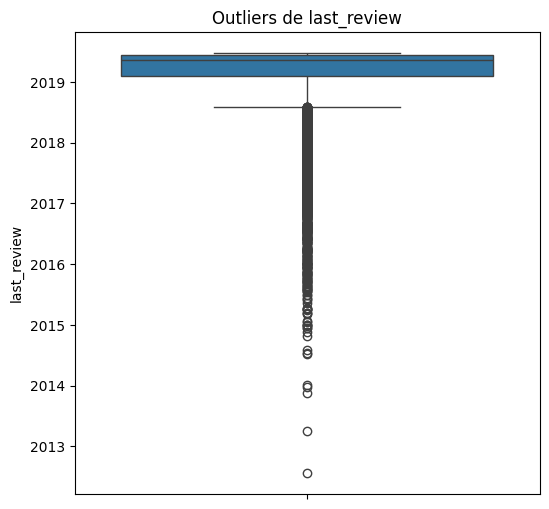

In [12]:
# Creamos un boxplot de last_review para saber si contiene muchos outliers y decidir como imputar
plt.figure(figsize=(6,6))
sns.boxplot(data= airbnb['last_review'])
plt.title('Outliers de last_review')
plt.show()

In [13]:
# Dado que contiene muchos outliers lo mejor es imputar con la mediana
airbnb['last_review'].fillna(airbnb['last_review'].median(), inplace=True)

C:\Users\eduar\AppData\Local\Temp\ipykernel_41240\3713980783.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airbnb['last_review'].fillna(airbnb['last_review'].median(), inplace=True)


In [14]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19030 entries, 0 to 19029
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              19030 non-null  int64         
 1   name                            19030 non-null  object        
 2   host_id                         19030 non-null  int64         
 3   host_name                       19030 non-null  object        
 4   neighbourhood                   19030 non-null  object        
 5   latitude                        19030 non-null  float64       
 6   longitude                       19030 non-null  float64       
 7   room_type                       19030 non-null  object        
 8   price                           19030 non-null  int64         
 9   minimum_nights                  19030 non-null  int64         
 10  number_of_reviews               19030 non-null  int64         
 11  la

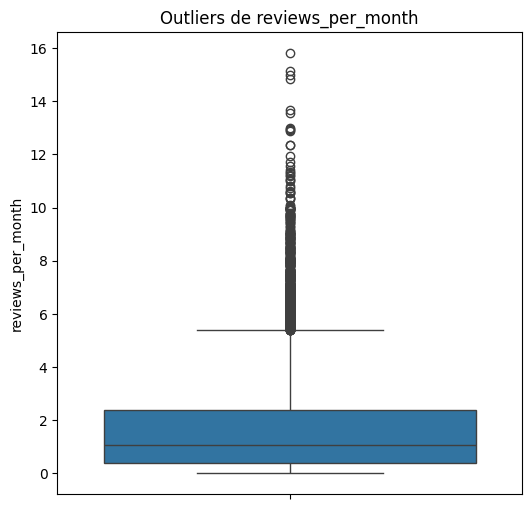

In [15]:
# Creamos boxplot de review_per_month para conocer la cantidad de outliers e imputar                                                  
plt.figure(figsize=(6,6))
sns.boxplot(data= airbnb['reviews_per_month'])
plt.title('Outliers de reviews_per_month')
plt.show()

In [16]:
airbnb['reviews_per_month'].describe()

count    14222.000000
mean         1.696200
std          1.762432
min          0.010000
25%          0.410000
50%          1.060000
75%          2.400000
max         15.810000
Name: reviews_per_month, dtype: float64

In [17]:

q1 = airbnb['reviews_per_month'].quantile(.25)
q3 = airbnb['reviews_per_month'].quantile(.75)
riq = q3 - q1

limite_inferior = q1 - 1.5 * riq
limite_superior = q3 + 1.5 * riq

cantidad_outliers = airbnb[(airbnb['reviews_per_month'] < limite_inferior) | (airbnb['reviews_per_month'] > limite_superior)]
cantidad_outliers.head(5)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
307,2084093,5 min from CDMX´s airport,10644799,Benito & Denisse,Venustiano Carranza,19.43987,-99.08805,Entire home/apt,421,1,468,2019-06-20,8.00,5,350
508,3595167,Independent stay near Independence Angel - Ref...,18112590,Valeria Y Carlos,Cuauhtémoc,19.43224,-99.16942,Entire home/apt,363,1,161,2019-06-13,6.18,2,308
514,3635953,Nice Loft in the heart of Polanco,18334496,Nando,Miguel Hidalgo,19.43145,-99.19048,Entire home/apt,2007,1,372,2019-06-16,6.23,5,139
551,3849434,"15th floor apartment Roma Norte, Mexico City",10731286,Larren,Cuauhtémoc,19.42141,-99.16640,Entire home/apt,1090,1,164,2019-06-08,6.16,2,230
610,4234262,Bonito Apartamento Art Déco en el Barrio Condesa,21970685,Rocio,Cuauhtémoc,19.41156,-99.17256,Entire home/apt,1204,2,318,2019-06-14,5.57,3,266


In [18]:
cantidad_outliers.shape[0]

632

In [19]:
# Vemos que la cantidad de outliers es del 4.44 %
proporcion = (cantidad_outliers.shape[0] / airbnb['reviews_per_month'].count()) * 100
print(proporcion)

4.443819434678667


In [20]:
# Imputamos con la mediana ya que suele ser menos sensible a los outliers
airbnb['reviews_per_month'].fillna(airbnb['reviews_per_month'].median(), inplace=True)

C:\Users\eduar\AppData\Local\Temp\ipykernel_41240\2758285413.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airbnb['reviews_per_month'].fillna(airbnb['reviews_per_month'].median(), inplace=True)


In [21]:
# Verificamos que nuestro DataFrame ha sido imputado
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19030 entries, 0 to 19029
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              19030 non-null  int64         
 1   name                            19030 non-null  object        
 2   host_id                         19030 non-null  int64         
 3   host_name                       19030 non-null  object        
 4   neighbourhood                   19030 non-null  object        
 5   latitude                        19030 non-null  float64       
 6   longitude                       19030 non-null  float64       
 7   room_type                       19030 non-null  object        
 8   price                           19030 non-null  int64         
 9   minimum_nights                  19030 non-null  int64         
 10  number_of_reviews               19030 non-null  int64         
 11  la

In [22]:
# Verificamos que nuestro DataFrame no tenga duplicados y en caso de que si los eliminamos
airbnb_sin_duplicados = airbnb.drop_duplicates()
airbnb_sin_duplicados.shape

(19030, 15)

#### Limpieza e imputacion de datos concluida

In [23]:
# Hacemos un resumen estadistico de nuestro DataFrame
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,1.903000e+04,1.903000e+04,19030.000000,19030.000000,19030.000000,19030.000000,19030.000000,19030,19030.000000,19030.000000,19030.000000
mean,2.333532e+07,9.912106e+07,19.398425,-99.168341,1138.357120,3.603836,20.160011,2019-03-04 08:22:58.707303936,1.535461,3.997898,213.073043
min,1.471400e+04,1.224300e+04,19.168170,-99.340820,0.000000,1.000000,0.000000,2012-07-24 00:00:00,0.010000,1.000000,0.000000
25%,1.721304e+07,3.055612e+07,19.374600,-99.180000,382.000000,1.000000,0.000000,2019-03-25 00:00:00,0.610000,1.000000,88.000000
50%,2.417835e+07,8.198402e+07,19.410740,-99.168370,688.000000,2.000000,5.000000,2019-05-15 00:00:00,1.060000,2.000000,205.000000
75%,3.135999e+07,1.595162e+08,19.429377,-99.154112,1223.000000,2.000000,23.000000,2019-06-02 00:00:00,1.880000,3.000000,353.000000
max,3.600174e+07,2.705221e+08,19.565340,-98.962770,349993.000000,1000.000000,470.000000,2019-06-23 00:00:00,15.810000,45.000000,365.000000
std,9.055829e+06,7.787163e+07,0.044978,0.033890,3875.438737,18.930649,36.120309,NaN,1.548474,6.708599,134.496775


In [24]:
# Hacemos un resumen estadistico de nuestro DataFrame incluyendo los tipos object
airbnb.describe(include='O')

,name,host_name,neighbourhood,room_type
count,19030,19030,19030,19030
unique,18543,3899,16,3
top,Depto Amueblado Nápoles World Trade Center WTC,Carlos,Cuauhtémoc,Private room
freq,13,240,7570,9428


#### Observaciones

La alcaldia que concentra mas AIRBNB es __Cuauhtémoc__ con 7570 

El tipo de propiedad mas común es __Private room__ com 9428

#### Vamos a analizar con mas detenimiento la columna __price__

Con el fin de elaborar visualizaciones para conocer como esta distribuida, outliers, cuantiles y etc.

Esto para encontrar como se encuentra relacionada con otras variables del dataset

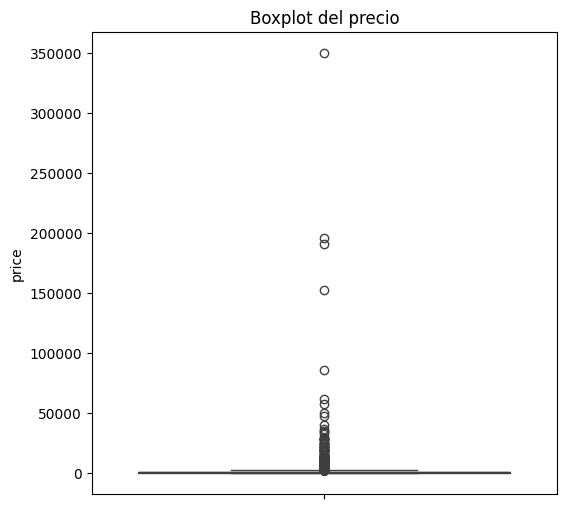

In [25]:
plt.figure(figsize= (6,6))
sns.boxplot(airbnb['price'])
plt.title('Boxplot del precio')
plt.show()

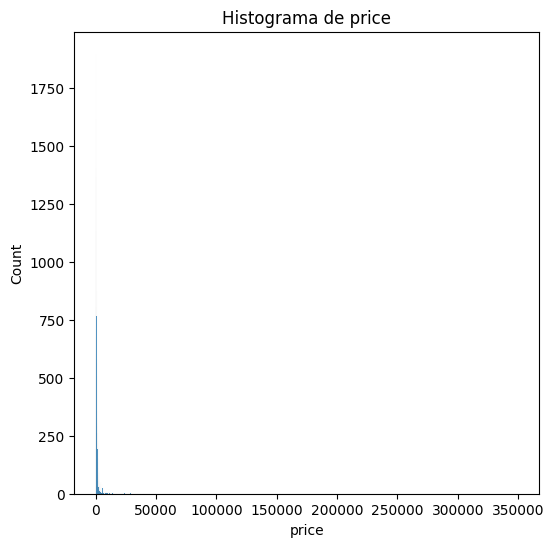

In [26]:
plt.figure(figsize=(6,6))
sns.histplot(data=airbnb['price'])
plt.title(f'Histograma de price')
plt.show()

In [27]:
airbnb['price'].describe()

count     19030.000000
mean       1138.357120
std        3875.438737
min           0.000000
25%         382.000000
50%         688.000000
75%        1223.000000
max      349993.000000
Name: price, dtype: float64

In [28]:
q1 = airbnb['price'].quantile(.25)
q3 = airbnb['price'].quantile(.75)
riq = q3 - q1

limite_inferior = q1 - 1.5 * riq
limite_superior = q3 + 1.5 * riq

cantidad_outliers = airbnb[(airbnb['price'] < limite_inferior) | (airbnb['price'] > limite_superior)]
cantidad_outliers.head(5)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3,35797,Villa Dante,153786,Dici,Cuajimalpa de Morelos,19.38399,-99.27335,Entire home/apt,3823,1,0,2019-05-15,1.06,2,363
10,75615,Villa Dante,153786,Dici,Cuajimalpa de Morelos,19.36585,-99.27911,Private room,3823,1,0,2019-05-15,1.06,2,88
11,98378,Up to -30% in last-minute stays & Summer Special,519159,Jorge & Monnah,Miguel Hidalgo,19.40236,-99.18163,Entire home/apt,4569,2,138,2019-06-19,1.50,13,201
12,99972,Dreamy suite w/ king size bed in boutique B&B,87973,Diego,Cuauhtémoc,19.44268,-99.16371,Private room,2753,1,0,2019-05-15,1.06,9,324
13,107078,NEW DESIGNER LOFT,540705,Andrea,Miguel Hidalgo,19.43130,-99.19438,Entire home/apt,4110,4,8,2019-06-17,0.21,2,345


In [29]:
print(f'La cantidad de outliers de la columna precio es: {cantidad_outliers.shape[0]}')
print(f'La proporcion porcentual es: {(cantidad_outliers.shape[0] / airbnb['price'].count()) * 100}')

La cantidad de outliers de la columna precio es: 1396
La proporcion porcentual es: 7.335785601681555


#### Observaciones

La columna _price_ esta gravemente sesgada por sus valores atipicos

#### Creamos un scatterplot de las columnas numericas para conocer un poco su distribución

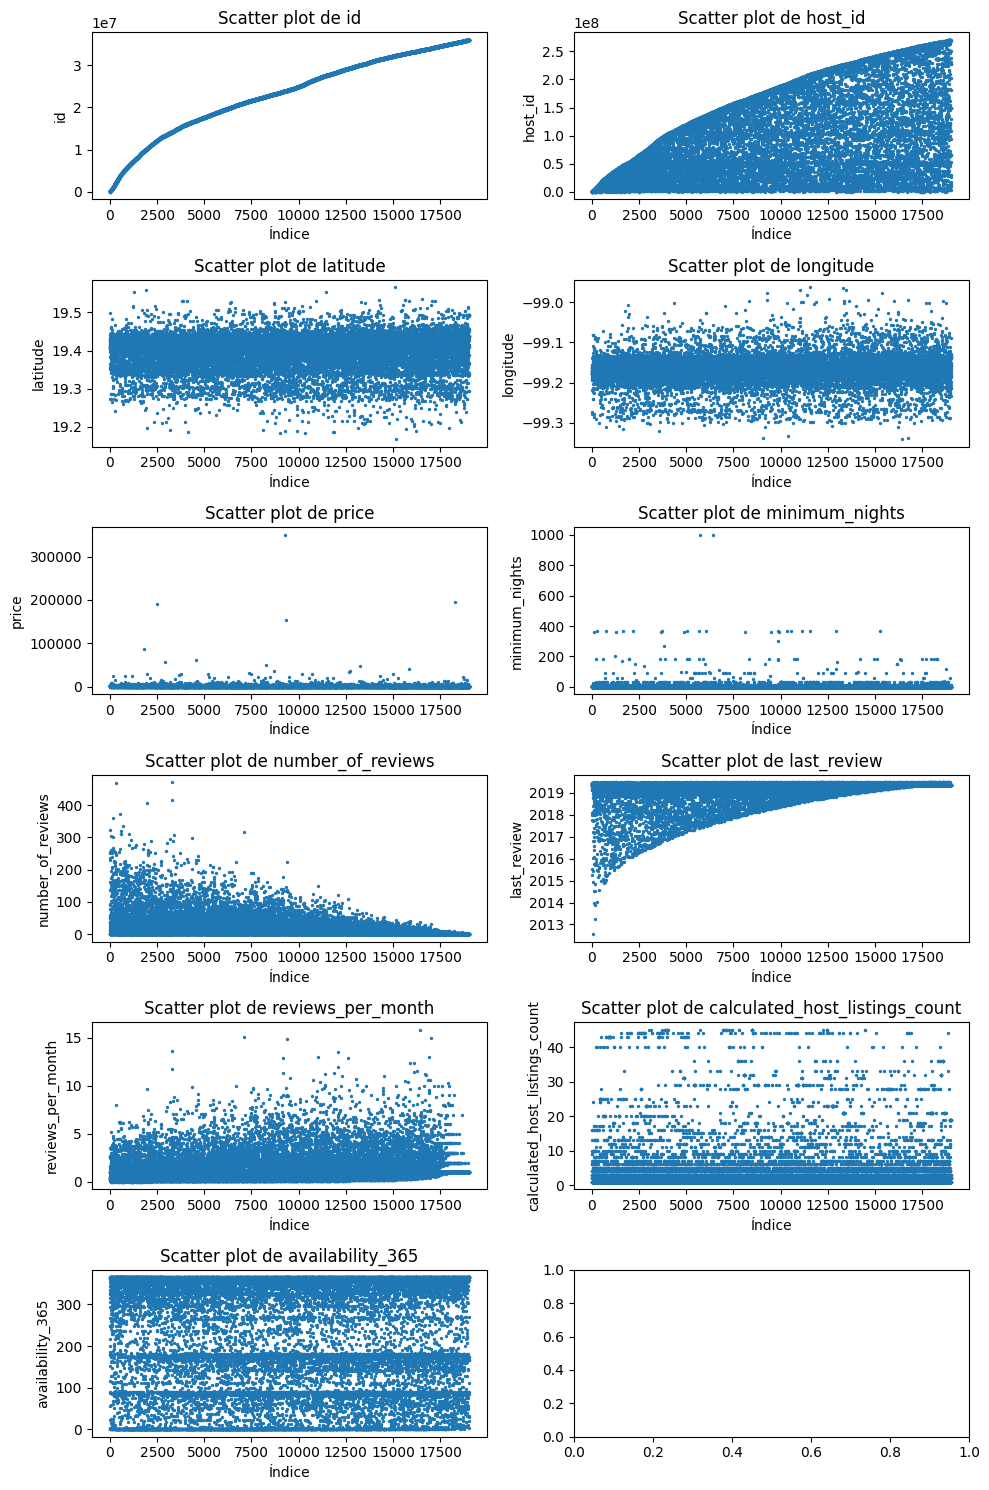

In [30]:
columnas = ['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'last_review',	'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(10, 15))

# Iterando sobre las columnas y las subgráficas
for i, col in enumerate(columnas):
    fila = i // 2
    columna = i % 2
    axs[fila, columna].scatter(airbnb.index, airbnb[col], s=2)
    axs[fila, columna].set_title(f'Scatter plot de {col}')
    axs[fila, columna].set_xlabel('Índice')
    axs[fila, columna].set_ylabel(col)

# Ajustando el layout para mejor visualización
plt.tight_layout()
plt.show()

#### Visualizamos la distribución de las Alcaldias y Room_type 

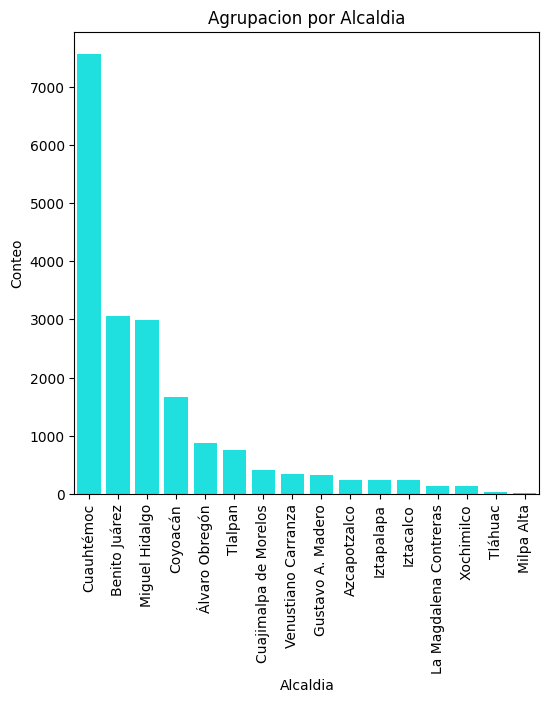

In [31]:
plt.figure(figsize=(6, 6))
sns.barplot(data= airbnb['neighbourhood'].value_counts(), color='cyan')
plt.xticks(rotation= 90) 
plt.xlabel('Alcaldia')
plt.ylabel('Conteo')
plt.title('Agrupacion por Alcaldia')
plt.show()

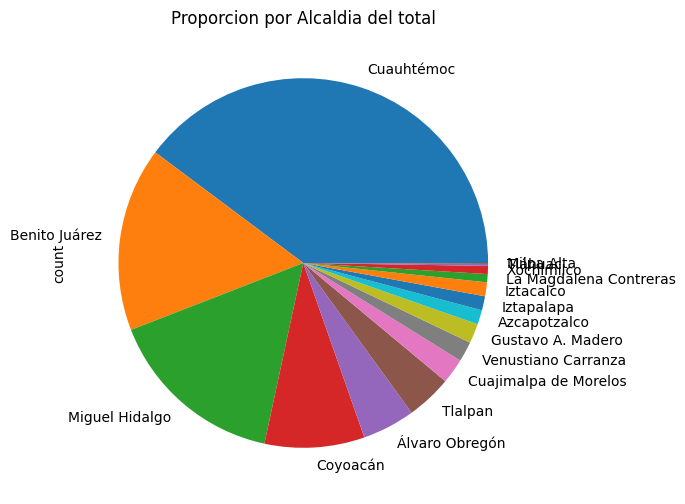

In [32]:
plt.figure(figsize=(6, 6))  
airbnb['neighbourhood'].value_counts().plot(kind='pie')
plt.title('Proporcion por Alcaldia del total')
plt.show()

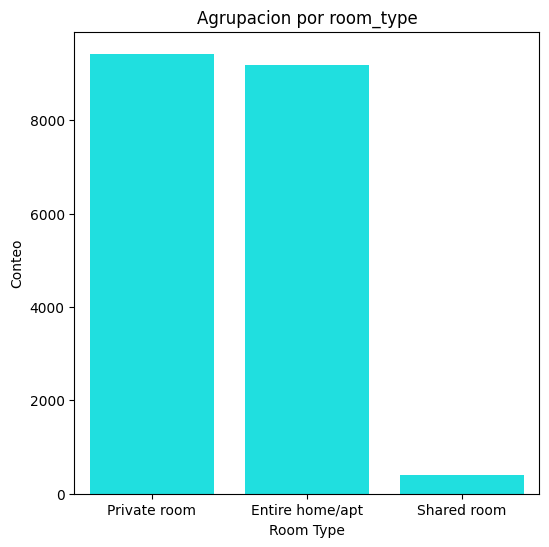

In [33]:
plt.figure(figsize=(6, 6))
sns.barplot(data=airbnb['room_type'].value_counts(), color='cyan')
plt.xlabel('Room Type')
plt.ylabel('Conteo')  
plt.title('Agrupacion por room_type')
plt.show()

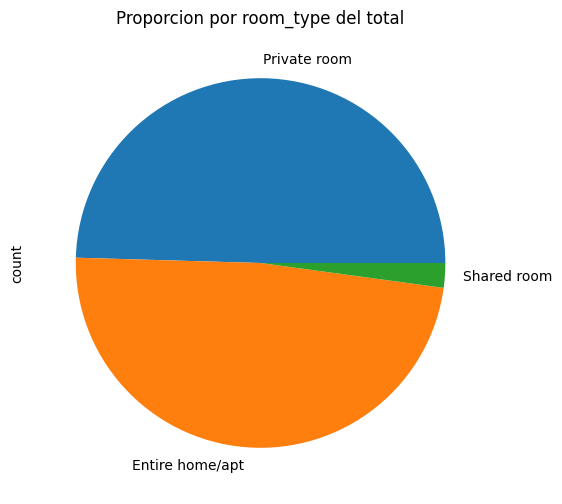

In [34]:
plt.figure(figsize=(6, 6))
airbnb['room_type'].value_counts().plot(kind='pie')
plt.title('Proporcion por room_type del total')
plt.show()

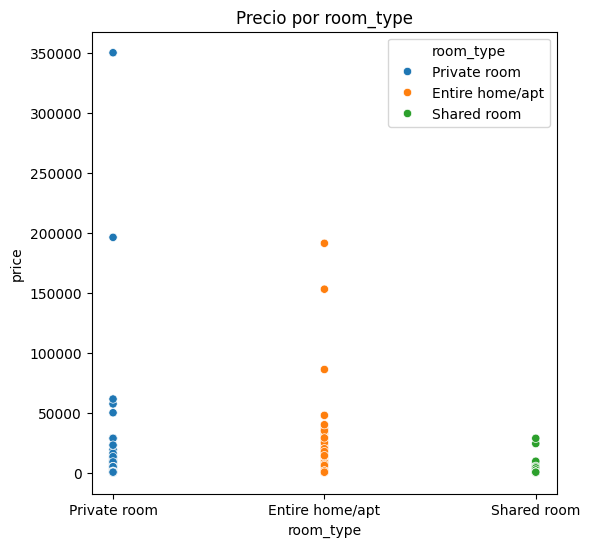

In [35]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x= airbnb['room_type'], y= airbnb['price'], hue=airbnb['room_type'])
plt.title('Precio por room_type')
plt.show()

#### Observaciones 

Como ya habiamos visto, la alcaldia con mas AIRBNB es __Cuauhtémoc__ y la que menos __Milpa Alta__

La propiedad mas popular es __Private room__ seguido muy de cerca por __Entire home/apt__ y muy pocos __Shared room__



#### Realizamos Scatter plot de varias columnas con precio para saber si tienen alguna relación

1. __price__ vs __minimun_nights__

2. __price__ vs __number_of_reviews__

3. __price__ vs __reviews_per_month__

4. __price__ vs __availability_365__

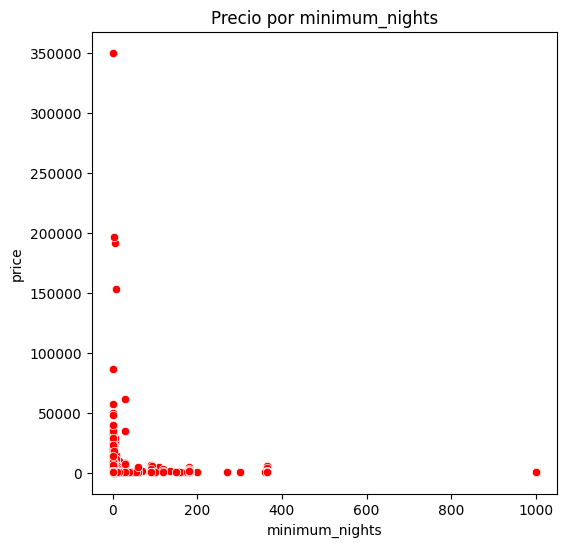

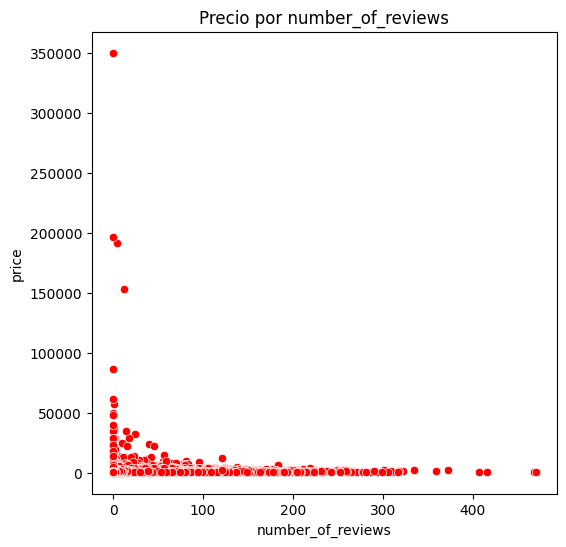

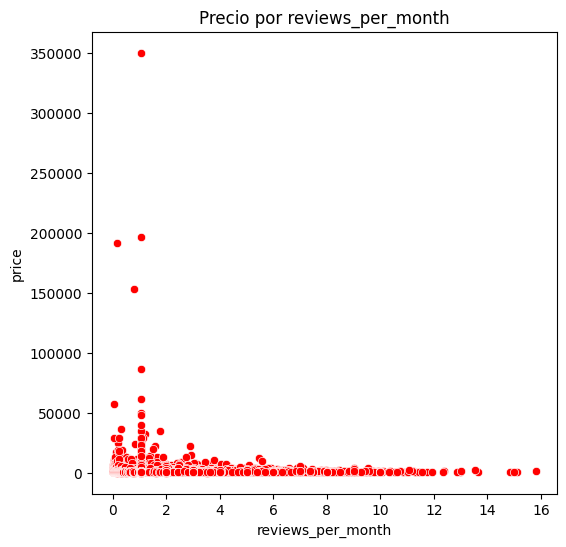

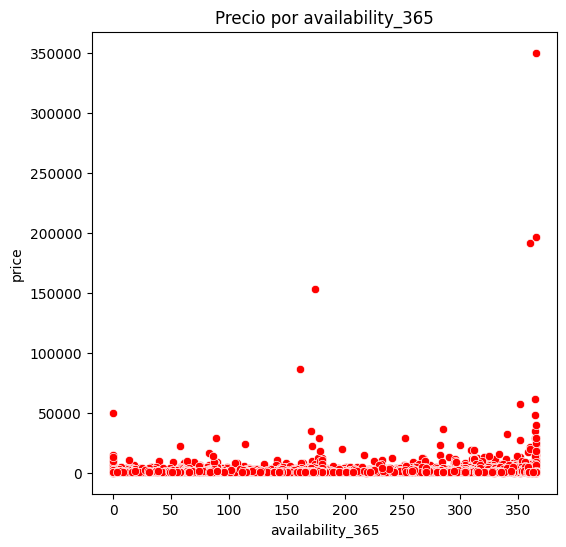

In [36]:
columnas_x_precio = airbnb[['minimum_nights', 'number_of_reviews', 'reviews_per_month',
                            'availability_365']]

for columna in columnas_x_precio:
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x= airbnb[columna], y= airbnb['price'], color='red')
    plt.title(f'Precio por {columna}')
    plt.show()

#### Creamos una matriz de correlación 

In [37]:
airbnb_numericos = airbnb.select_dtypes(include='number')
airbnb_numericos.columns

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

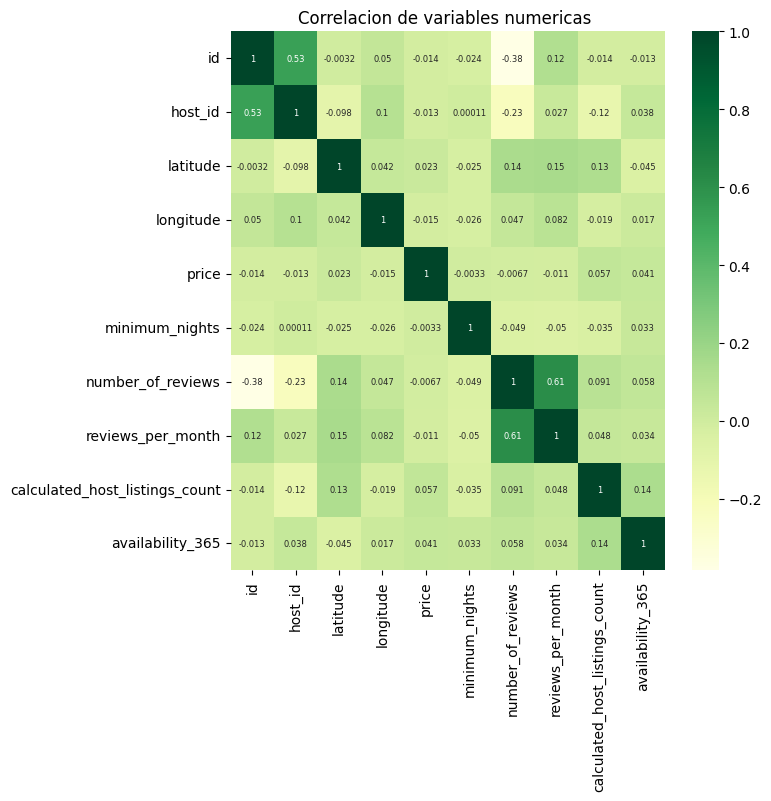

In [38]:
correlaciones = airbnb_numericos.corr()
plt.figure(figsize=(7, 7))
sns.heatmap(data=correlaciones, annot=True, annot_kws={"size": 6}, cmap='YlGn')
plt.title('Correlacion de variables numericas ')
plt.show()

#### Histogramas de algunas variables de interes para conocer su ditribución

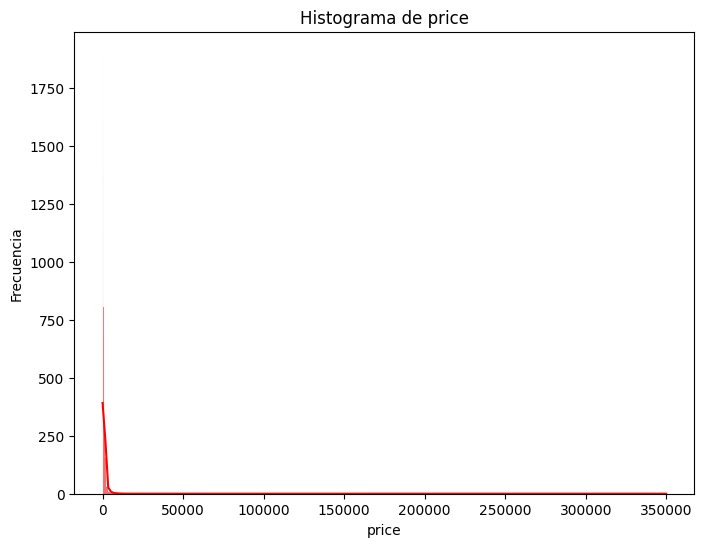

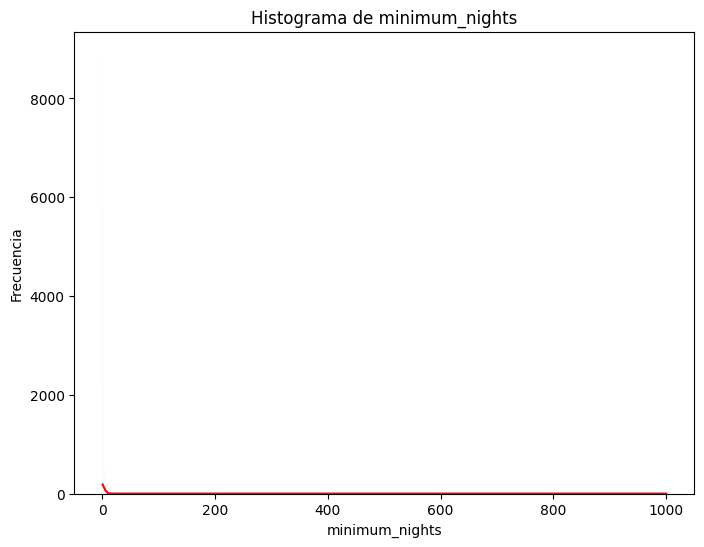

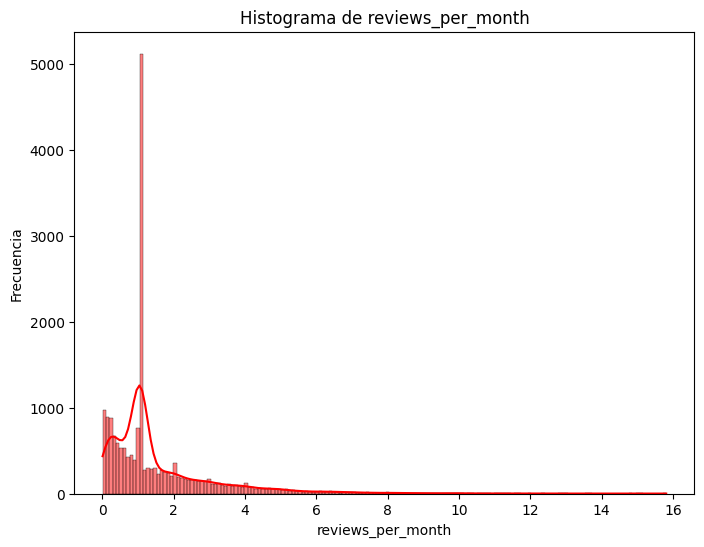

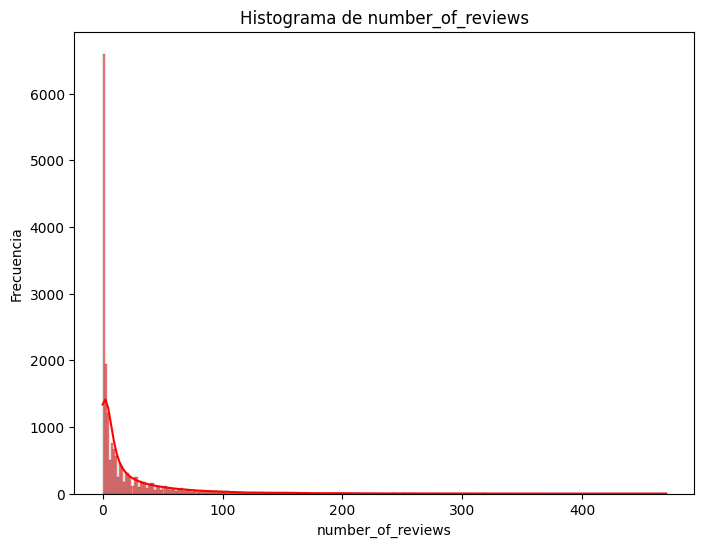

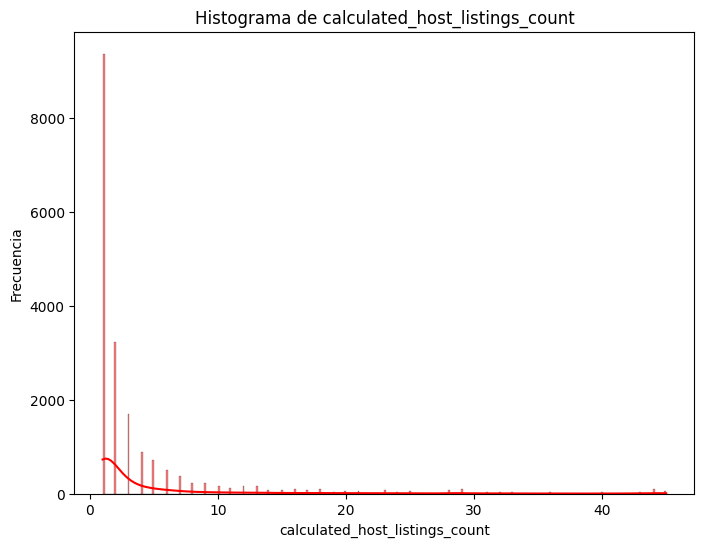

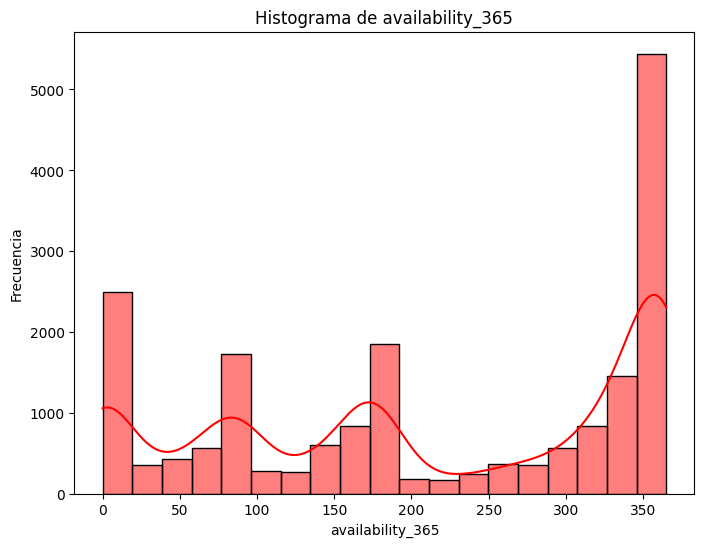

In [39]:
columnas_histogramas = airbnb[['price', 'minimum_nights', 'reviews_per_month', 'number_of_reviews', 
                               'calculated_host_listings_count', 'availability_365']]
for columna in columnas_histogramas:
    plt.figure(figsize=(8, 6))
    sns.histplot(airbnb[columna], kde=True, color='red')
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.show()

### Es llamativo el sesgo que tiene algunas gráficas, asi que revisemos la proporción de outliers

In [40]:
def outliers(feature):
    q1 = airbnb[feature].quantile(.25)
    q3 = airbnb[feature].quantile(.75)
    riq = q3 - q1

    limite_inferior = q1 - 1.5 * riq
    limite_superior = q3 + 1.5 * riq

    cantidad_outliers = airbnb[(airbnb[feature] < limite_inferior) | (airbnb[feature] > limite_superior)]
    print(f'La cantidad de outliers de la columna {feature} es: {cantidad_outliers.shape[0]}')
    print(f'La proporcion porcentual es: {((cantidad_outliers.shape[0] / airbnb[feature].count()) * 100)}')
    print('--------------------------------------------------------------------')


In [41]:
for col in columnas_histogramas:
    outliers(col)

La cantidad de outliers de la columna price es: 1396
La proporcion porcentual es: 7.335785601681555
--------------------------------------------------------------------
La cantidad de outliers de la columna minimum_nights es: 2034
La proporcion porcentual es: 10.68838675775092
--------------------------------------------------------------------
La cantidad de outliers de la columna reviews_per_month es: 1693
La proporcion porcentual es: 8.896479243300053
--------------------------------------------------------------------
La cantidad de outliers de la columna number_of_reviews es: 2005
La proporcion porcentual es: 10.535995796111402
--------------------------------------------------------------------
La cantidad de outliers de la columna calculated_host_listings_count es: 2649
La proporcion porcentual es: 13.920126116657908
--------------------------------------------------------------------
La cantidad de outliers de la columna availability_365 es: 0
La proporcion porcentual es: 0.0
-

### Visualizemos un poco la distribución espacial de los AIRBNB

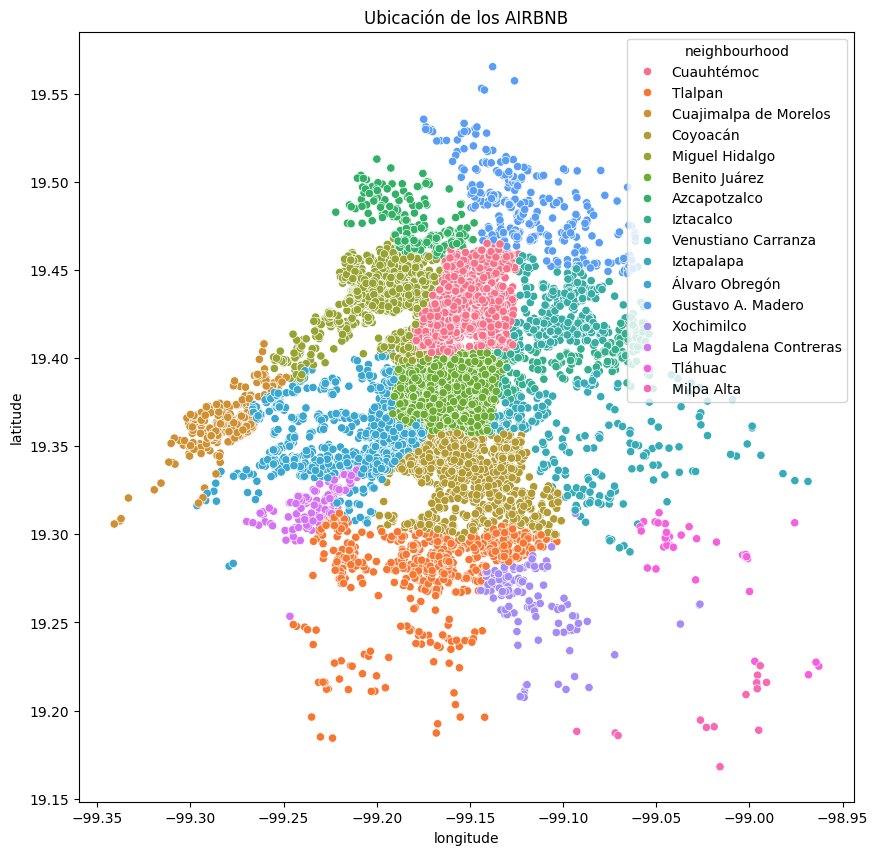

In [42]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=airbnb['longitude'], y=airbnb['latitude'], hue=airbnb['neighbourhood'])
plt.title('Ubicación de los AIRBNB')
plt.show()

### En este mapa coropletico se ve claramente la distribución de propiedades por Alcaldia y la alta densidad en Cuauhtémoc

In [43]:
for col in columnas_histogramas:
    print(f'La descripción de {col}')
    print(airbnb[col].describe())
    print('-----------------------------')

La descripción de price
count     19030.000000
mean       1138.357120
std        3875.438737
min           0.000000
25%         382.000000
50%         688.000000
75%        1223.000000
max      349993.000000
Name: price, dtype: float64
-----------------------------
La descripción de minimum_nights
count    19030.000000
mean         3.603836
std         18.930649
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max       1000.000000
Name: minimum_nights, dtype: float64
-----------------------------
La descripción de reviews_per_month
count    19030.000000
mean         1.535461
std          1.548474
min          0.010000
25%          0.610000
50%          1.060000
75%          1.880000
max         15.810000
Name: reviews_per_month, dtype: float64
-----------------------------
La descripción de number_of_reviews
count    19030.000000
mean        20.160011
std         36.120309
min          0.000000
25%          0.000000
50%          5.000000
75%     

#### Observaciones 

Para la columna __price__ encontramos que tiene outliers que sesgan gravemente el dato

### En la correlacion de variables

- La __latitude__ tiene una correlación con __number_of_reviews__, __review_per_month__ y 
__calculated_host_listings_count__
- El __price__ esta correlacionado debil pero claramente con __latitude__, __calculated_host_listings_count__ y __availability_365__
- Las __minimun_nights__ con __availability_365__
- Las __number_of_reviews__ con __latitude__, __longitude__, __calculated_host_listings_count__, __availability_365__ y muy altamente con __reviews_per_month__
- Las __reviews_per_month__ con __latitude__, __longitude__, __calculated_host_listings_count__, __availability_365__ y muy altamente con __number_of_reviews__ 
- El __calculated_host_listings_count__ con __price__, __number_of_reviews__, __review_per_month__ y __availability_365__
- La __availability_365__ con __price__, __minimun_nights__, __number_of_reviews__, __review_per_month__ y alta con __calculated_host_listings_count__

### Distribuciónes

- __price__ tiene un gran sesgo debido a sus outliers
- __minimun_nights__ tiene una distribución bastante uniforme
- __review_per_month__ tiene la mayor cantidad de sus datos entre 0 y 4 reviews, con un gran pico en 2
- __number_of_reviews__ tiene una distribución que muestra una clara acumulación en las unidades y desciende sostenidamente hacia las más de 100
- __calculated_host_listings_count__ se acumula mayoritariamente y desciende sostenidamente hasta 10 donde se aplana la distribucion
- __availability_365__ tiene varios picos en su distribución: más de 5000 propiedades con más de 360 dias disponibles; en segunda 2500 propiedades entre 0 y 20 dias disponibles y en tercera poco menos de 2000 propiedades entre 80 y 100 dias y de igual forma entre 170 y 190 dias

In [44]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19030 entries, 0 to 19029
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              19030 non-null  int64         
 1   name                            19030 non-null  object        
 2   host_id                         19030 non-null  int64         
 3   host_name                       19030 non-null  object        
 4   neighbourhood                   19030 non-null  object        
 5   latitude                        19030 non-null  float64       
 6   longitude                       19030 non-null  float64       
 7   room_type                       19030 non-null  object        
 8   price                           19030 non-null  int64         
 9   minimum_nights                  19030 non-null  int64         
 10  number_of_reviews               19030 non-null  int64         
 11  la

### Hacemos un poco de Feature Engineering con la columna __last_review__ para enriquecer nuestro analísis

In [45]:
airbnb['Dia-semana'] = airbnb['last_review'].dt.day_name()
airbnb['month'] = airbnb['last_review'].dt.month
airbnb['Anio'] = airbnb['last_review'].dt.year

In [46]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19030 entries, 0 to 19029
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              19030 non-null  int64         
 1   name                            19030 non-null  object        
 2   host_id                         19030 non-null  int64         
 3   host_name                       19030 non-null  object        
 4   neighbourhood                   19030 non-null  object        
 5   latitude                        19030 non-null  float64       
 6   longitude                       19030 non-null  float64       
 7   room_type                       19030 non-null  object        
 8   price                           19030 non-null  int64         
 9   minimum_nights                  19030 non-null  int64         
 10  number_of_reviews               19030 non-null  int64         
 11  la

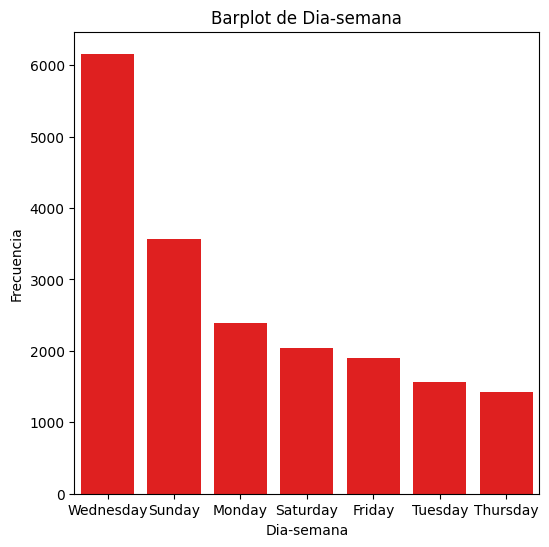

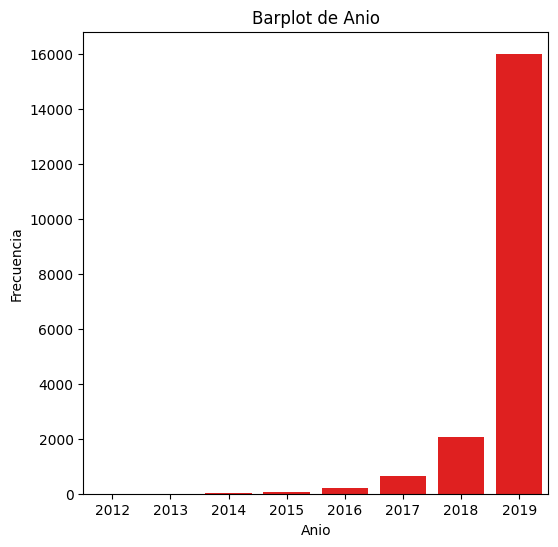

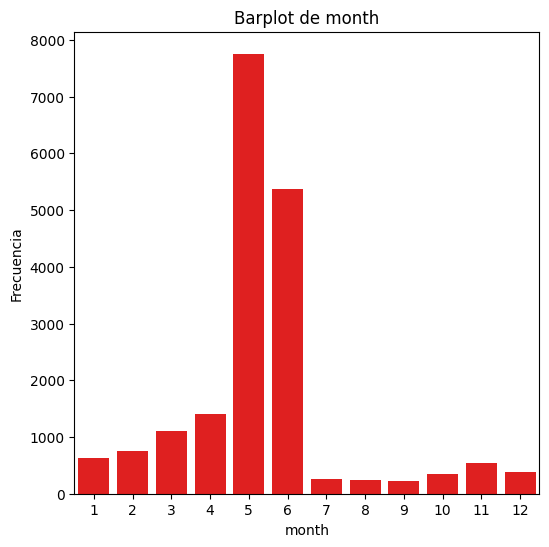

In [47]:
fechas = ['Dia-semana', 'Anio', 'month']

for fecha in fechas:
    plt.figure(figsize=(6,6))
    sns.barplot(data=airbnb[fecha].value_counts(), color='red')
    plt.title(f'Barplot de {fecha}')
    plt.xlabel(fecha)
    plt.ylabel('Frecuencia')
    plt.show()

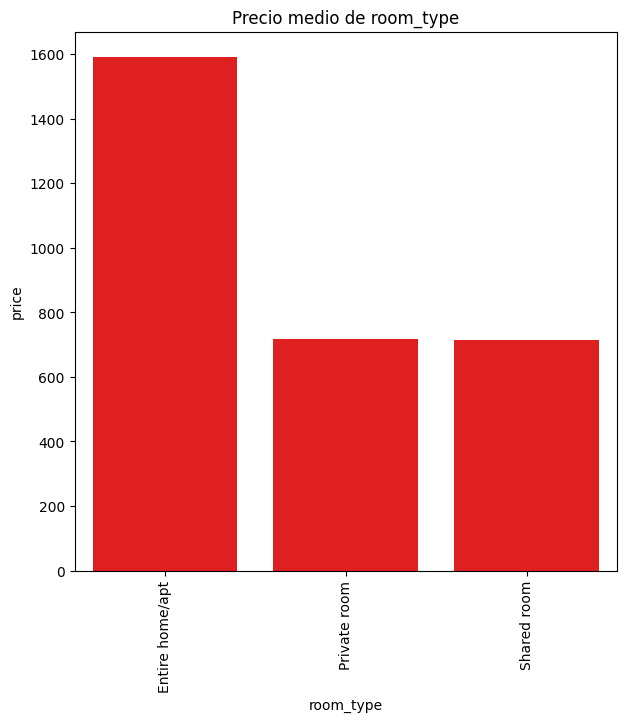

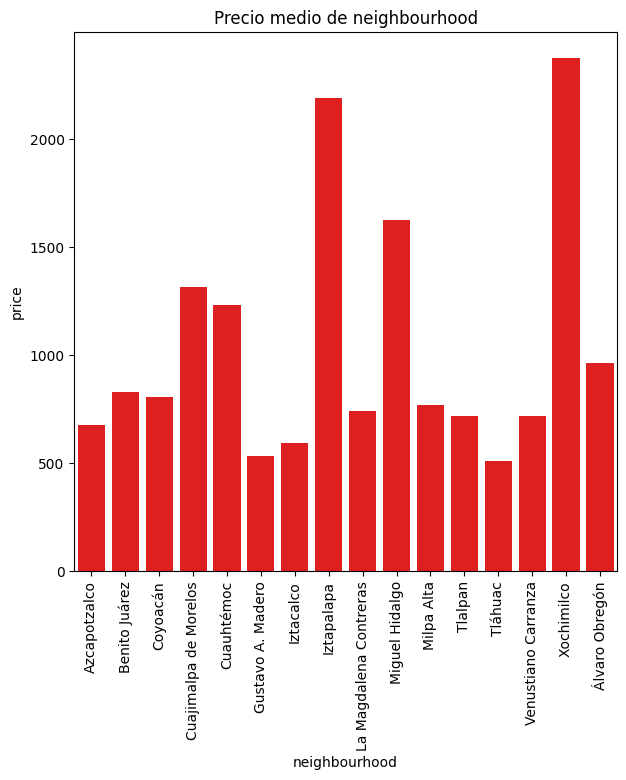

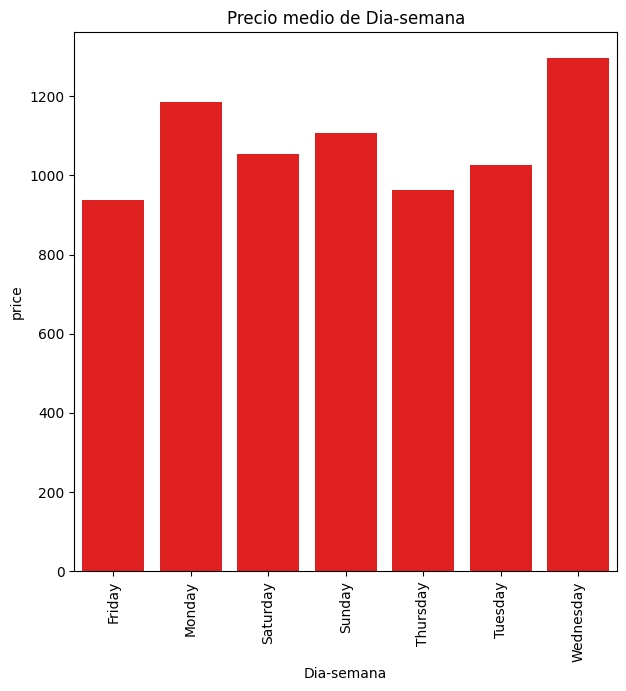

In [48]:
columnas = ['room_type', 'neighbourhood', 'Dia-semana']

for col in columnas:
    plt.figure(figsize=(7,7))
    sns.barplot(data=airbnb.groupby(col)['price'].mean(), color='red')
    plt.title(f'Precio medio de {col}')
    plt.xlabel(col)
    plt.xticks(rotation = 90)
    plt.show()

### Observaciones

- Aparentemente el dia miércoles es el más frecuente seguido del domingo y el jueves el menos
- El año con más rentas es el 2019
- Los meses con mas ocupacion son Mayo y Junio, probablemente por epóca vacacional
- El precio medio más alto lo tiene Entire Home/Apt. Private Room y Shared Room tiene el mismo precio medio
- Xochimilco e Iztapalapa tienen los precios medios mas altos a pesar de no tener tantas propiedades
- Miercoles da el precio mdeio mas alto a causa de que tambien es el mas frecuente, pero el lunes es el segundo mas alto a pesar de no ser mas frecuente que el domingo

### Dado que hay variables de interes que se sesgan mucho por los outliers, es conveniente reducir la variable a intervalos para visualizarlo de mejor forma

In [49]:
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
labels = ['0-100', '101-200', '201-300', '301-400', '401-500', '501-600', '601-700', '701-800', '801-900', '901-1000']

# Dividir la columna en intervalos
airbnb['intervalos_minimun_nights'] = pd.cut(airbnb['minimum_nights'], bins=bins, labels=labels)

In [50]:
# review_per_month y avaibility

bins = [0, 2, 4, 6, 8, 10, 12, 14, 16]
labels = ['0-2', '3-4', '5-6', '7-8', '9-10', '11-12', '13-14', '15-16']

# Dividir la columna en intervalos
airbnb['intervalos_review_month'] = pd.cut(airbnb['reviews_per_month'], bins=bins, labels=labels)

In [51]:
bins = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390]
labels = ['0-30', '31-60', '61-90', '91-120', '121-150', '151-180', '181-210', '211-240', '241-270', '271-300', '301-330', '331-360', '361-390']

# Dividir la columna en intervalos
airbnb['intervalos_availability'] = pd.cut(airbnb['availability_365'], bins=bins, labels=labels)

In [52]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19030 entries, 0 to 19029
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              19030 non-null  int64         
 1   name                            19030 non-null  object        
 2   host_id                         19030 non-null  int64         
 3   host_name                       19030 non-null  object        
 4   neighbourhood                   19030 non-null  object        
 5   latitude                        19030 non-null  float64       
 6   longitude                       19030 non-null  float64       
 7   room_type                       19030 non-null  object        
 8   price                           19030 non-null  int64         
 9   minimum_nights                  19030 non-null  int64         
 10  number_of_reviews               19030 non-null  int64         
 11  la

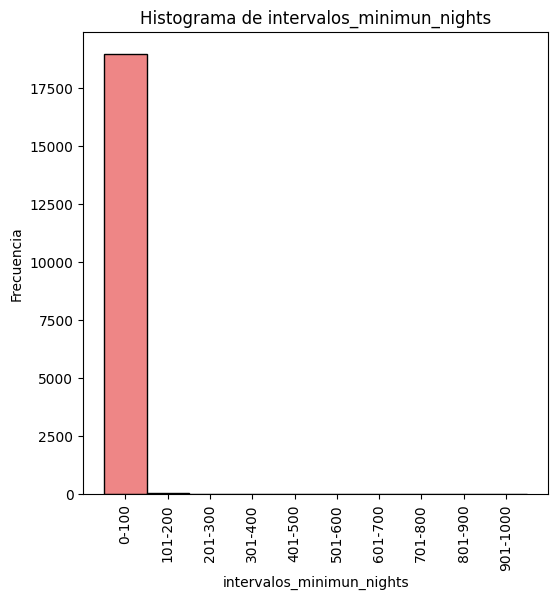

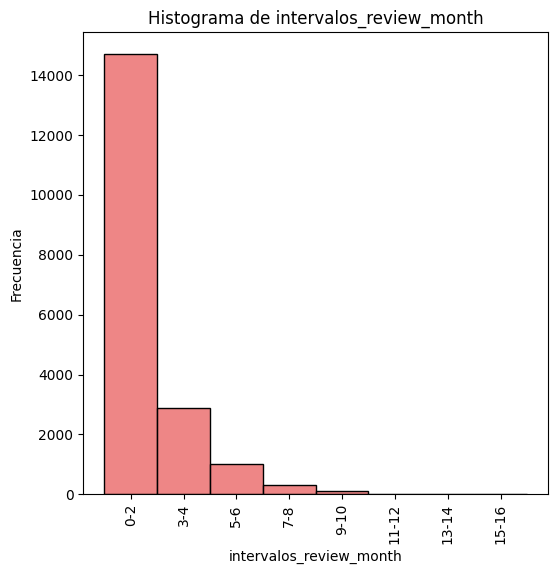

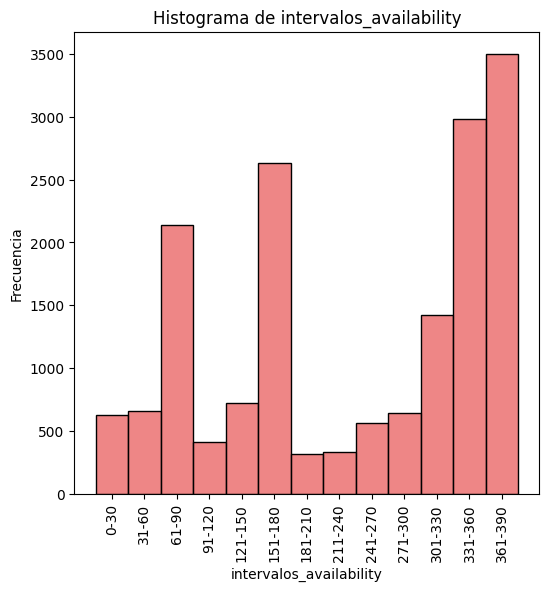

In [53]:
columnas = ['intervalos_minimun_nights', 'intervalos_review_month', 'intervalos_availability']

for col in columnas:
    plt.figure(figsize=(6,6))
    sns.histplot(data= airbnb[col], color='#E95D5E')
    plt.xticks(rotation = 90)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

### Observaciones

- La mayor parte de los AIRBNB se rentan entre 0 y 100 dias
- Más de 14000 datos tienen entre 0 y 2 reviews por mes y 3000 entre 3 y 4
- La variable avaibility esta mas dispersa, con una mayor proporcion de propiedades disponibles mas de 360 dias, los menos frecuentes son las propiedades con disponibilidad entre 181 y 210 dias

### 